# Practical Lab: Linear Regression by using the gradient descent algorithm

## Utils

In [1]:
from sklearn import datasets # data
import os # directory management
import pandas as pd # data analysis
from scipy import stats # descriptive statistics
import matplotlib.pyplot as plt # figures
import numpy as np # maths
import seaborn as sns

## Data

In [9]:
#-- Reading the (training) data in a data frame
path=r"C:\Users\Admin\OneDrive - Université Bretagne Sud\CLASSES\MACHINE LEARNING\Linear regression\pm25_train_data.csv"
training=pd.read_csv(path, sep=";")
#training.head
training.columns

Index(['PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure',
       'dew point', 'rainfall', 'windspeed'],
      dtype='object')

In [46]:
training.head()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,24.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,93.0,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,117.0,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,58.0,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,226.0,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3


In [16]:
#-- Save the explanatory variables in a variable X (and their names in a varaible feature_names), and the target variable in Y
feature_names=training.columns[1:]
print(feature_names)


Index(['SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure', 'dew point',
       'rainfall', 'windspeed'],
      dtype='object')


In [24]:
X=training.iloc[1:,1:].values
print(X)

[[ 2.50e+01  7.60e+01  9.00e+02 ... -1.64e+01  0.00e+00  2.70e+00]
 [ 7.70e+01  9.90e+01  1.60e+03 ... -1.33e+01  0.00e+00  1.10e+00]
 [ 1.20e+01  1.40e+01  4.00e+02 ... -1.39e+01  0.00e+00  2.70e+00]
 ...
 [ 4.60e+01  9.90e+01  3.00e+03 ... -7.10e+00  0.00e+00  1.30e+00]
 [ 7.00e+00  1.50e+01  5.00e+02 ... -1.08e+01  0.00e+00  4.10e+00]
 [ 1.20e+01  5.40e+01  1.20e+03 ... -1.03e+01  0.00e+00  1.30e+00]]


In [25]:

Y=training['PM2.5'].values
print(Y)

[ 24.  93. 117. ... 543. 505. 227.]


### Analyse and select the data to be studied

In [27]:
#-- Display some statistics on the data by using the describe function on the dataframe
training.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11918.000000,11667.000000,11636.000000,11462.000000,11677.000000,11898.000000,11898.000000,11898.000000,11898.000000,11900.000000
mean,144.962326,21.960768,44.788865,1165.367650,73.894402,17.924920,1009.787557,2.765969,0.047630,2.243664
std,103.807565,27.065010,33.186310,1019.736671,51.840188,10.751675,10.074917,13.483896,0.532651,1.346997
min,3.000000,0.571200,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.300000,0.000000,1.300000
50%,120.000000,12.000000,37.000000,900.000000,66.000000,19.900000,1009.400000,3.100000,0.000000,1.900000
75%,192.000000,29.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


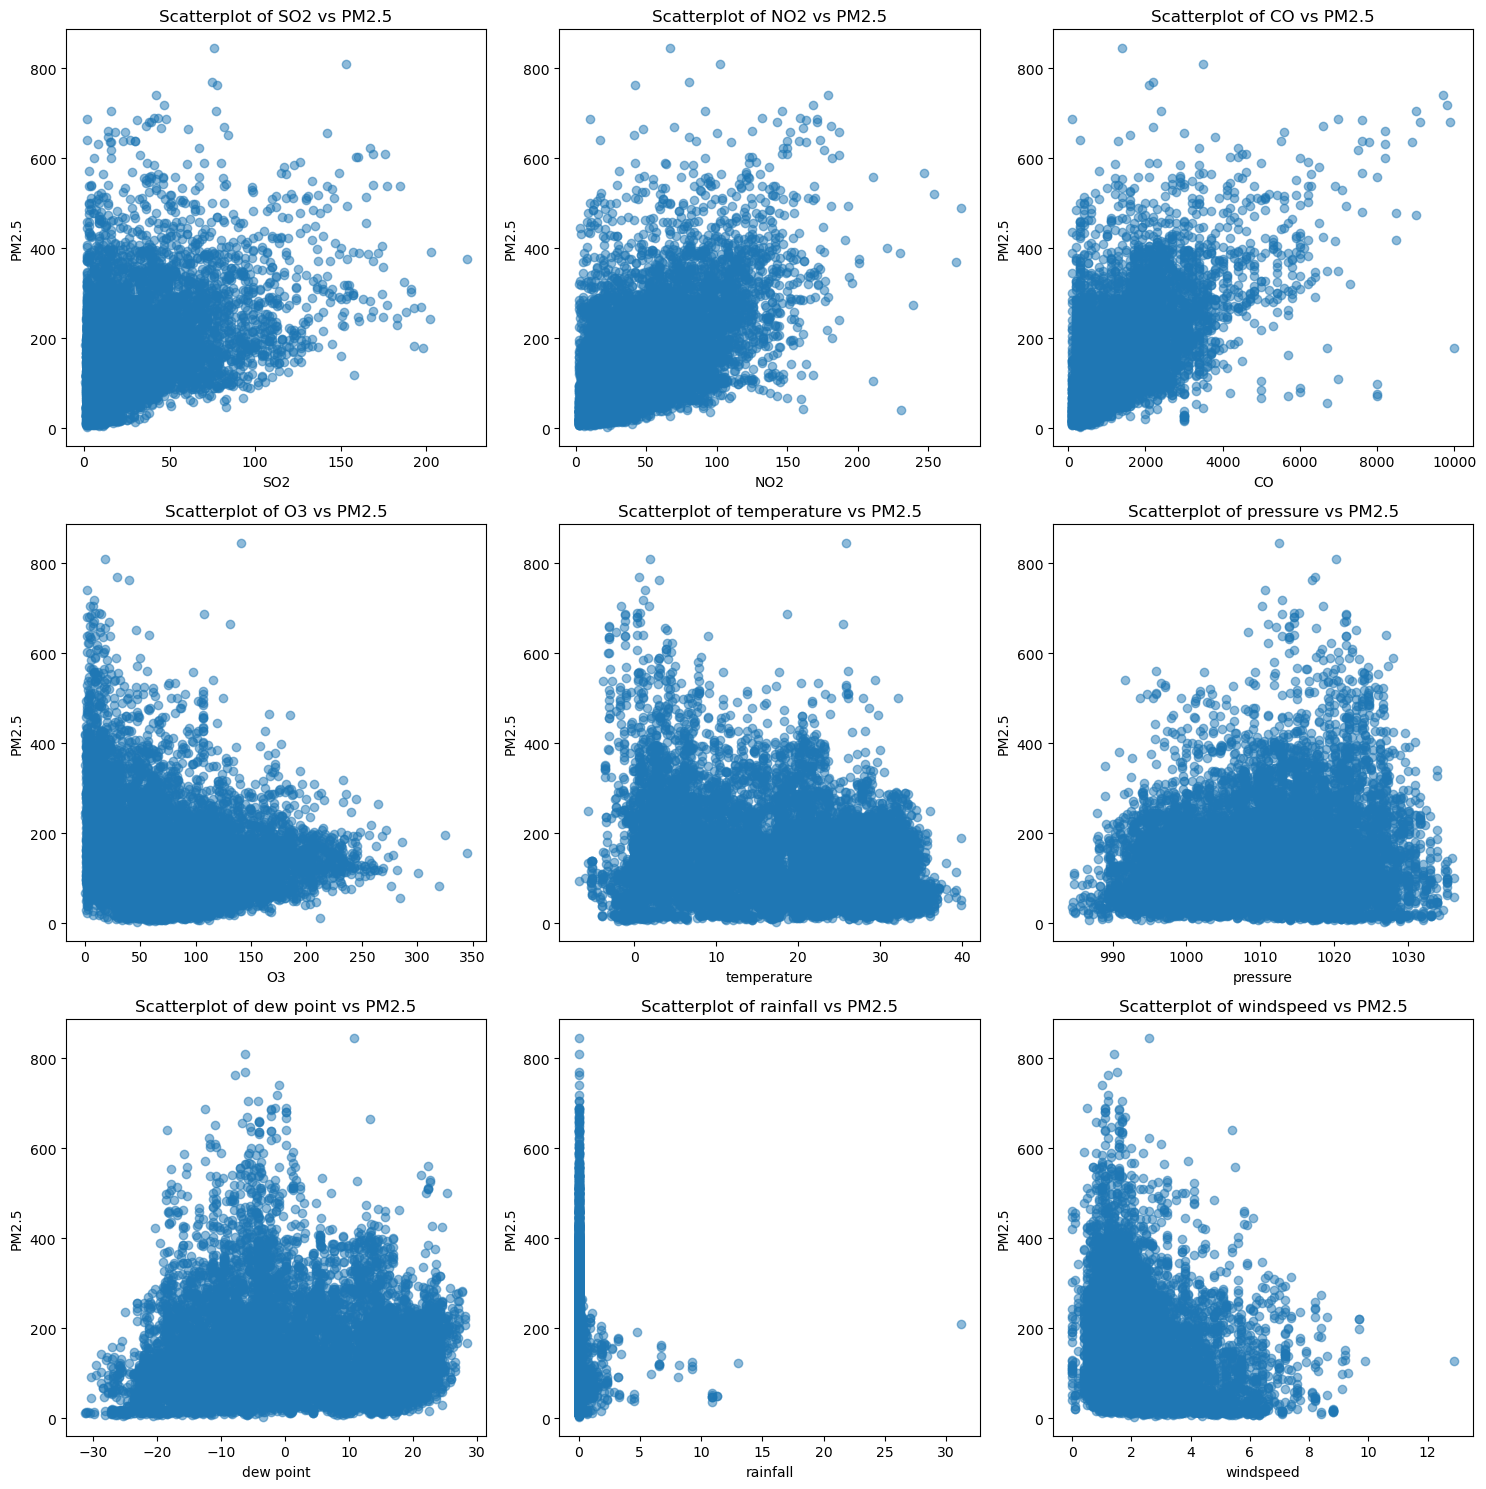

In [37]:

explanatory_variables = feature_names
dependent_variable = "PM2.5"

# Create a figure with subplots
plt.figure(figsize=(15,15))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables):
    plt.subplot(331 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()


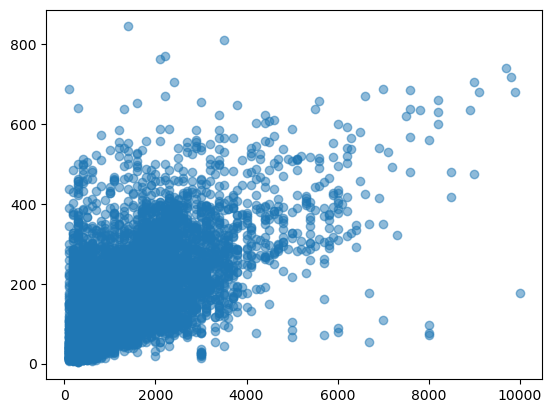

In [39]:
#-- Select the explanatory variables for the simple linear regression
explanatory_variable_linear="CO"
plt.scatter(training[explanatory_variable_linear], training[dependent_variable], alpha=0.5)
plt.show()

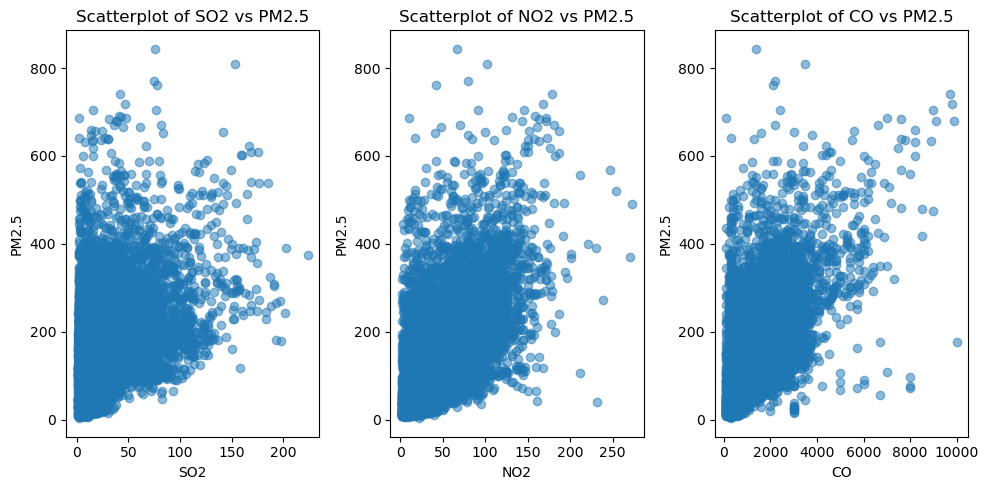

In [42]:
#-- Select the explanatory variables for the multiple linear regression, and display the scatter plots
explanatory_variables_multi = ["SO2","NO2","CO"]

# Create a figure with subplots
plt.figure(figsize=(10,5))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables_multi):
    plt.subplot(131 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()




In [66]:
#-- Extract the data and creates two X matrices that will be used for the regression
#---- Xs for simple lin reg and Xm for multiple lin reg

Xm=data[explanatory_variables_multi].values
Xs=data[explanatory_variable_linear].values.reshape(-1, 1)
#-- Check the size of both matrices
#print(Xm.shape)

## Hint: use stack/hstack/vstack

(11918, 3)


In [ ]:
#--- Write the standardisation function to mean-center the X data
def standardisation(X):

    
    
#-- Test 1 - simple lin reg


#-- Test 2 - multiple lin reg




In [ ]:
#-- Preparing the matrix used for the regression linear when using the gradient descent algorithm



## Least squares or maximum likelihood solution

In [ ]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#-- Formulae recall: (X^T X)^-1 X^T Y
def coef_ml():

    
    
#-- Test 1  - simple reg

#-- Test 2 - multiple reg

#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

## Gradient descent algorithm

In the following, we will implement several functions to apply linear regression.
These functions should be **generic** and work for any number of explanatory variables. You should be able to apply them to Xs and Xm standardized variables. 

WARNING: parameters of the functions needs to be completed

In [ ]:
#-- Model
def f():
    return 

#-- Test 1 - simple reg

#-- Test 2 - multiple reg


In [ ]:
#-- Cost function
def cout(): 
    return 

#-- Test 1 - simple reg

#-- Test 2 - multiple reg


In [ ]:
#-- Computation of the gradient
def grad():
    return

#-- Test 1 - simple reg


#-- Test 2 - multiple reg


In [ ]:
#-- Gradient descent algorithm
def grad_descent():
    return

#-- Test 1  - simple reg


#-- Test 2 - multiple reg


## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1  - simple reg


#-- Test 2 - multiple reg

**Notes:**


## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1  - simple reg


#-- Test 2 - multiple reg


**Notes:**

## Notes
**on the choice of the stopping criterion:**





**on the data normalisation:**





**Notes:**